<a href="https://colab.research.google.com/github/Anonymous3017/AI-ML-Training/blob/main/Day_11_Ayush_Track_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
cars = pd.read_csv('/content/cars.csv')

In [ ]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
cars.shape

(261, 8)

In [ ]:
cars['brand']

0           US.
1       Europe.
2           US.
3           US.
4           US.
         ...   
256         US.
257      Japan.
258         US.
259         US.
260         US.
Name: brand, Length: 261, dtype: object

In [ ]:
le=LabelEncoder()
le.fit(cars["brand"])



LabelEncoder()

In [ ]:
cars["brand"] = le.transform(cars["brand"])

In [ ]:
cars["brand"]

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int64

In [ ]:
x = cars.drop("brand",axis=1)
y= cars.brand

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((208, 7), (53, 7), (208,), (53,))

In [ ]:
dt_tree = DecisionTreeClassifier(criterion="gini",max_features=3,max_depth=3)

In [ ]:
dt_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3)

In [ ]:
y_pred = dt_tree.predict(x_test)

In [ ]:
y_pred

array([2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1,
       2, 0, 1, 0, 2, 0, 1, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score



In [ ]:
accuracy_score(y_test,y_pred)

0.660377358490566

In [ ]:
#plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(0.5769230769230769, 0.875, 'cubicinches <= 134.5\ngini = 0.53\nsamples = 208\nvalue = [35, 41, 132]\nclass =  US.'),
 Text(0.3076923076923077, 0.625, 'year <= 1978.5\ngini = 0.643\nsamples = 86\nvalue = [32, 36, 18]\nclass =  Japan.'),
 Text(0.15384615384615385, 0.375, 'cubicinches <= 113.5\ngini = 0.583\nsamples = 47\nvalue = [26, 14, 7]\nclass =  Europe.'),
 Text(0.07692307692307693, 0.125, 'gini = 0.622\nsamples = 31\nvalue = [13, 13, 5]\nclass =  Europe.'),
 Text(0.23076923076923078, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [13, 1, 2]\nclass =  Europe.'),
 Text(0.46153846153846156, 0.375, 'year <= 1982.5\ngini = 0.579\nsamples = 39\nvalue = [6, 22, 11]\nclass =  Japan.'),
 Text(0.38461538461538464, 0.125, 'gini = 0.5\nsamples = 30\nvalue = [5, 20, 5]\nclass =  Japan.'),
 Text(0.5384615384615384, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [1, 2, 6]\nclass =  US.'),
 Text(0.8461538461538461, 0.625, 'cubicinches <= 190.5\ngini = 0.125\nsamples = 122\nvalue = [3, 5, 114]\nclass

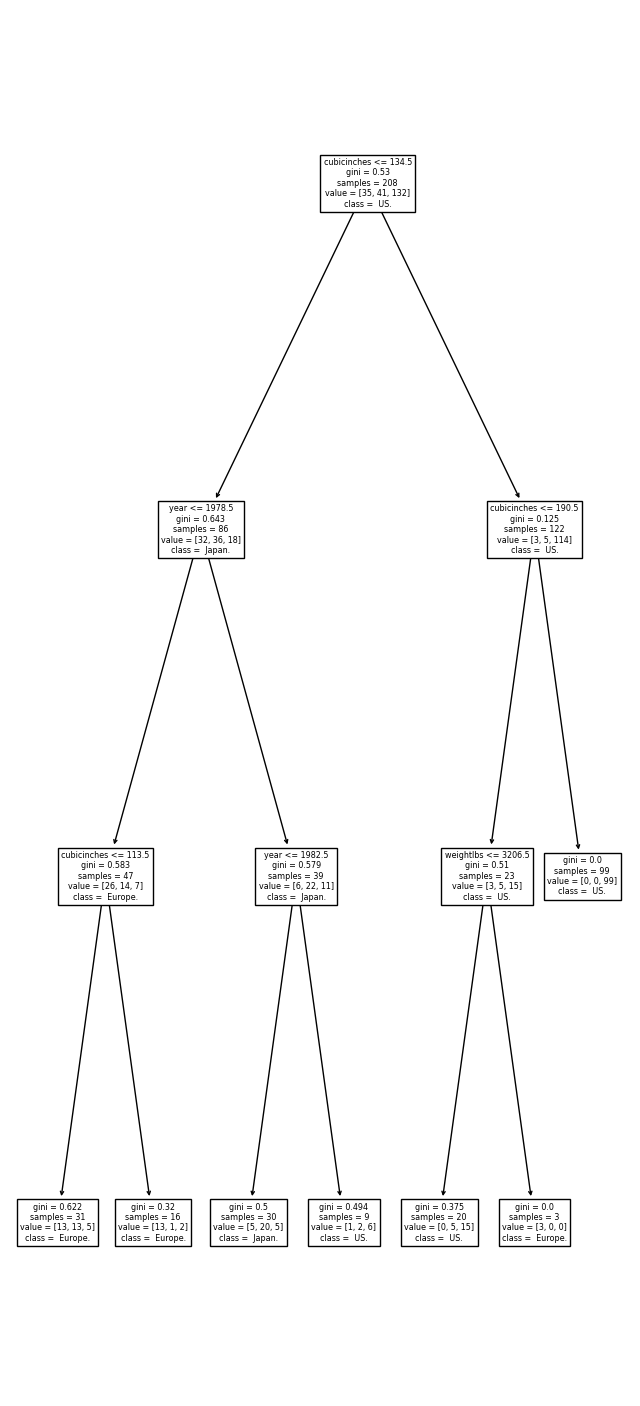

In [ ]:
plt.figure(figsize=(8,18))
plot_tree(dt_tree,class_names=list(le.classes_),feature_names=list(x_train.columns))

In [ ]:
dt_tree.feature_importances_

array([0.        , 0.        , 0.78529241, 0.        , 0.07197184,
       0.        , 0.14273575])

In [ ]:
pd.DataFrame({"features":x_train.columns,"Importance":dt_tree.feature_importances_})

,features,Importance
0,mpg,0.000000
1,cylinders,0.000000
2,cubicinches,0.785292
3,hp,0.000000
4,weightlbs,0.071972
5,time-to-60,0.000000
6,year,0.142736


In [ ]:
#random Fores
rf=RandomForestClassifier(criterion="gini",n_estimators=200,max_depth=3)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7735849056603774

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=393702759),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1614952524),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1191640124),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=30720253),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=831035982),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=747283601),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1058540535),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=280357271),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1770507036),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1765541416),
 DecisionTreeClassifier(max_depth=3, max_featu

[Text(0.5, 0.875, 'weightlbs <= 2697.0\ngini = 0.53\nsamples = 131\nvalue = [35, 41, 132]\nclass =  US.'),
 Text(0.25, 0.625, 'time-to-60 <= 14.5\ngini = 0.655\nsamples = 56\nvalue = [25, 39, 29]\nclass =  Japan.'),
 Text(0.125, 0.375, 'mpg <= 33.05\ngini = 0.571\nsamples = 13\nvalue = [15, 4, 7]\nclass =  Europe.'),
 Text(0.0625, 0.125, 'gini = 0.483\nsamples = 11\nvalue = [15, 4, 3]\nclass =  Europe.'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 4]\nclass =  US.'),
 Text(0.375, 0.375, 'weightlbs <= 2062.0\ngini = 0.597\nsamples = 43\nvalue = [10, 35, 22]\nclass =  Japan.'),
 Text(0.3125, 0.125, 'gini = 0.291\nsamples = 10\nvalue = [3, 14, 0]\nclass =  Japan.'),
 Text(0.4375, 0.125, 'gini = 0.61\nsamples = 33\nvalue = [7, 21, 22]\nclass =  US.'),
 Text(0.75, 0.625, 'hp <= 77.5\ngini = 0.19\nsamples = 75\nvalue = [10, 2, 103]\nclass =  US.'),
 Text(0.625, 0.375, 'cylinders <= 5.5\ngini = 0.408\nsamples = 2\nvalue = [5, 0, 2]\nclass =  Europe.'),
 Text(0.5625, 0.125, 

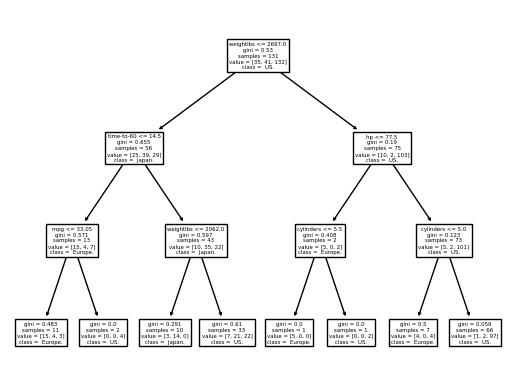

In [ ]:
plot_tree(rf.estimators_[0],class_names=list(le.classes_),feature_names=list(x_train.columns))

In [ ]:
df=pd.DataFrame({
                'Num_flights': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                 'Avg_fare': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]})
df=df[['Num_flights','Avg_fare']]
df.head()

,Num_flights,Avg_fare
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels=kmeans.predict(df)

In [ ]:
kmeans.cluster_centers_

array([[23.42857143, 44.57142857],
       [62.33333333, 15.83333333],
       [50.        , 63.16666667]])

In [ ]:
kmeans.inertia_

1624.4285714285716

KMeans(n_clusters=3)

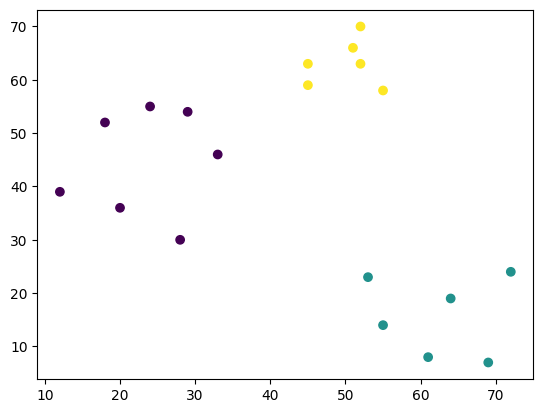

In [ ]:
plt.scatter(df['Num_flights'],df['Avg_fare'],c=labels)

In [ ]:
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[13654.210526315788,
 5022.628205128205,
 1624.4285714285716,
 1081.75,
 850.9166666666666,
 647.0833333333333,
 534.8333333333333,
 424.5,
 312.25,
 270.5833333333333]

In [ ]:
len(inertia)

10

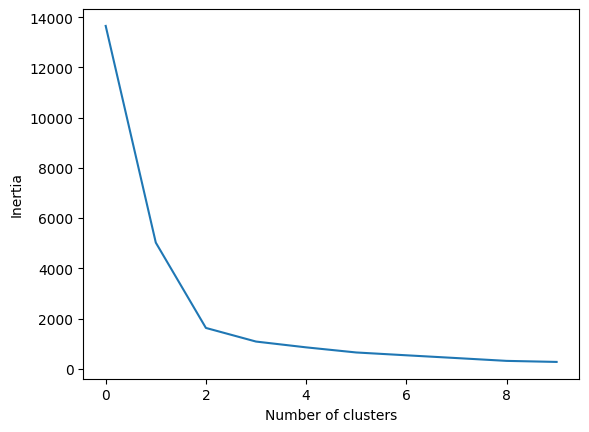

In [ ]:
plt.plot(inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
x=iris.data
y=iris.target

In [ ]:
df = pd.DataFrame(x,columns=iris.feature_names)

In [ ]:
df['target'] = y

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pc=pca.fit_transform(x)

In [ ]:
pc_df = pd.DataFrame(pc,columns=['PC1','PC2'])

In [ ]:
pc_df["target"]=y

In [ ]:
pc_df.head()

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


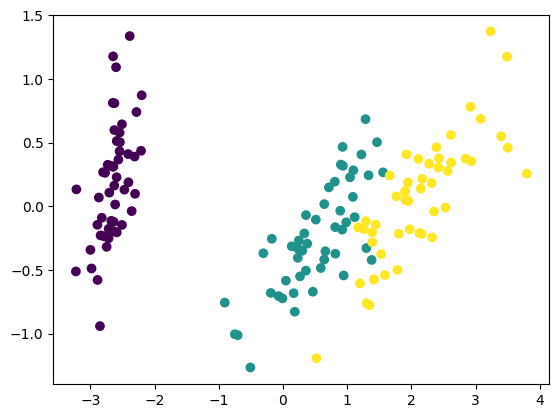

In [ ]:
plt.scatter(pc_df["PC1"],pc_df["PC2"],c=pc_df["target"])

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [ ]:
#LDA
#correlation filter
#variance filter


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
lda=LDA(n_components=2)

In [ ]:
lda.fit_transform(x_train,y_train)
x_train_lda = lda.transform(x_train)

In [ ]:
x_test_lda=lda.transform(x_test)

In [ ]:
# rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train_lda,y_train)

RandomForestClassifier()

In [ ]:
y_pred_lda = rf.predict(x_test_lda)

In [ ]:
accuracy_score(y_test,y_pred_lda)

0.9333333333333333

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

In [ ]:
x,_=make_circles(n_samples=600,random_state=4)

In [ ]:
dbscan=DBSCAN(eps=0.1,min_samples=4)
clusters=dbscan.fit_predict(x)

In [ ]:
x

array([[-0.4702282 ,  0.6472136 ],
       [ 0.08362277, -0.79561752],
       [ 0.79369176,  0.10026659],
       ...,
       [-0.77886312,  0.1826807 ],
       [-0.87630668, -0.48175367],
       [-0.83292124,  0.55339155]])

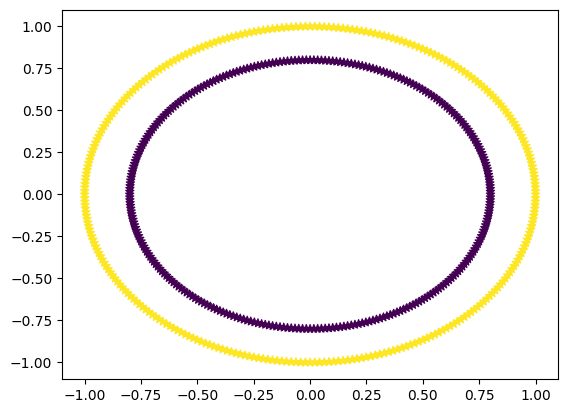

In [ ]:
plt.scatter(x[:,0],x[:,1],c=clusters,marker="*")

# Assesment

## Problem Statement: Decision Tree Using the CART Algorithm

You are given a dataset,“car_evaluation.csv.”Load the dataset into a DataFrame without the header and rename the columns as the list given here -['buying',  'maint',  'doors',  'persons',  'lug_boot', 'safety',  'class'].

Considering  the class column  as  the  target variable, perform the following tasks:

1.Explore the target column,class(our task is to predict how the car features  affectthe  class  of  car  asVery  good,  Good,  Acceptable,  or  Unacceptable, whichis why we have considered this column as the target column)

2.Declare feature vectors and the target variable

3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)

4.Encode all     the     ordinal     data     into     numeric     values     using     the category_encoderslibrary

5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria

6.Check the accuracy score of the model based on the Gini Index

7.Visualize the decision tree


8.Show how the importance of features affects the target variable


In [ ]:
data = pd.read_csv('/content/car_evaluation.csv', header=None)
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
x = df.drop('class',axis=1)
y = df['class']

In [ ]:
x.shape,y.shape

((1728, 6), (1728,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
for i in df.columns:
  print(f"{i}\n{df[i].value_counts()}\n")

buying
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

persons
2       576
4       576
more    576
Name: persons, dtype: int64

lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64

safety
low     576
med     576
high    576
Name: safety, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [ ]:
!pip install category_encoders
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['doors', 'persons', 'buying', 'maint', 'lug_boot', 'safety'])
x_train_encoded = encoder.fit_transform(x_train)

In [ ]:
x_test_encoded = encoder.transform(x_test)

In [ ]:
x_train_encoded.shape

(1382, 6)

In [ ]:
x_test_encoded.shape

(346, 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(x_train_encoded, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(x_test_encoded)

In [ ]:
accuracy =  accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


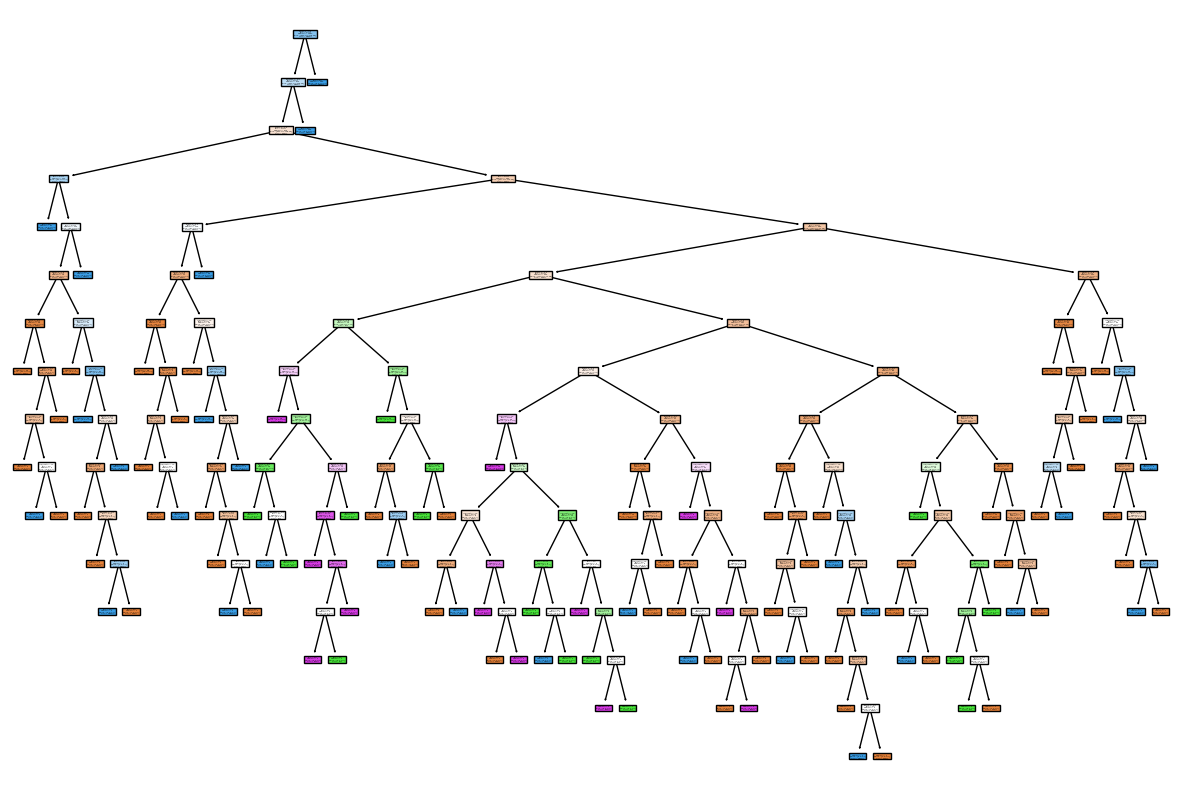

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=x_train_encoded.columns, class_names=df['class'].unique(), filled=True)
plt.show()

In [ ]:
feature_importances = clf.feature_importances_

fi_df = pd.DataFrame({'Feature': x_train_encoded.columns, "Importance": feature_importances})

fi_df = fi_df.sort_values(by='Importance', ascending=False)

fi_df

,Feature,Importance
3,persons,0.243788
5,safety,0.230609
4,lug_boot,0.174429
1,maint,0.140490
0,buying,0.134380
2,doors,0.076304


## Problem Statement: Naïve Bayes Classification

Write a Python program that reads the mobile price.csv file into a DataFrame, by doing the given task builds good naïve Bayes models.

1.Load the mobile price.csvdataset into a DataFrame

2.Check the data type of each column and change it according to their data

3.Find missing values and treat themif you found any

4.Plot bar graph for target variable and their categories with help of seaborn

5.Extract   independent   variables   (Xs)   and   dependent   variables   (Ys)   into separate data objects6

.Split data into train and test DataFrame and set test size as 0.27.

Build Gaussian and Bernoulli models, compare their accuracy

In [ ]:
#Imports here
import seaborn as sns

In [ ]:
price = pd.read_csv('/content/mobile_price.csv')

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
price["clock_speed"] = price["clock_speed"].astype("int")
price["m_dep"] = price["m_dep"].astype("int")

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

In [ ]:
price.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
price['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

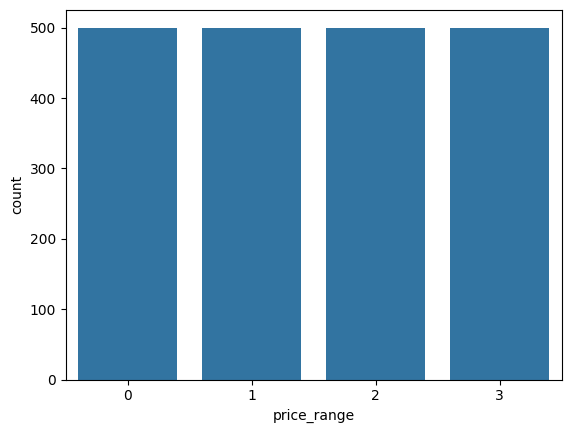

In [ ]:
sns.countplot(data = price,x='price_range',)

In [ ]:
x = price.drop('price_range',axis=1)
y = price['price_range']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.27,random_state=1)

In [ ]:
#Gaussian Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
gnb_accuracy =  accuracy_score(y_test,y_pred)
print(f"Accuracy: {gnb_accuracy:.2f}")

Accuracy: 0.75
